# Outliers II & Missing Values

Ahora buscaremos missing values y outliers

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import missingno as msn

In [49]:
data = pd.read_csv('../data/bus_data_stage_3.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.tail()

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed,matrix_position
95601,813,236,-56.124500,-34.841720,2018-10-02 17:47:43,-56.124916,-34.842804,2018-10-02 17:47:58,126.372707,0 days 00:00:15.000000000,8.424847,"[9, 14]"
95602,813,236,-56.124916,-34.842804,2018-10-02 17:47:58,-56.125250,-34.843887,2018-10-02 17:48:13,124.221731,0 days 00:00:15.000000000,8.281449,"[9, 14]"
95603,813,236,-56.125250,-34.843887,2018-10-02 17:48:13,-56.125694,-34.845470,2018-10-02 17:48:58,180.624887,0 days 00:00:45.000000000,4.013886,"[9, 13]"
95604,813,236,-56.125694,-34.845470,2018-10-02 17:48:58,-56.126415,-34.847443,2018-10-02 17:49:28,229.041450,0 days 00:00:30.000000000,7.634715,"[9, 13]"
95605,813,236,-56.126415,-34.847443,2018-10-02 17:49:28,-56.126720,-34.848305,2018-10-02 17:49:43,99.809236,0 days 00:00:15.000000000,6.653949,"[9, 13]"


In [107]:
def ms_to_kh(ms):
    return (ms*18)/5

Buscamos missing values con la libreria missingno que nos muestra un diagrama de barras con espacios en los missing values.

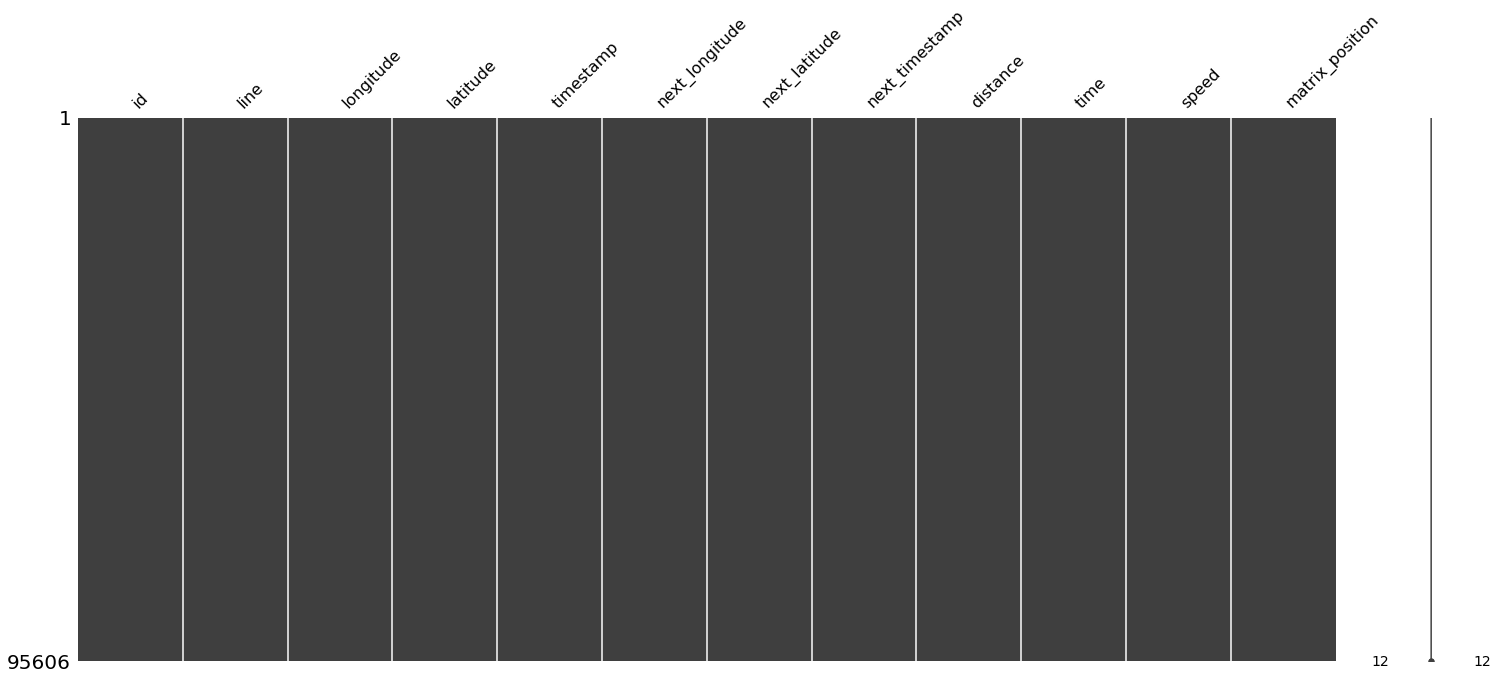

In [97]:
msn.matrix(data)

Vemos que no encuentra ningun missing value

Ahora buscamos outliers y para esto usamos un diagrama de `boxenplot` muy similar a un diagrama de caja _(boxplot)_

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

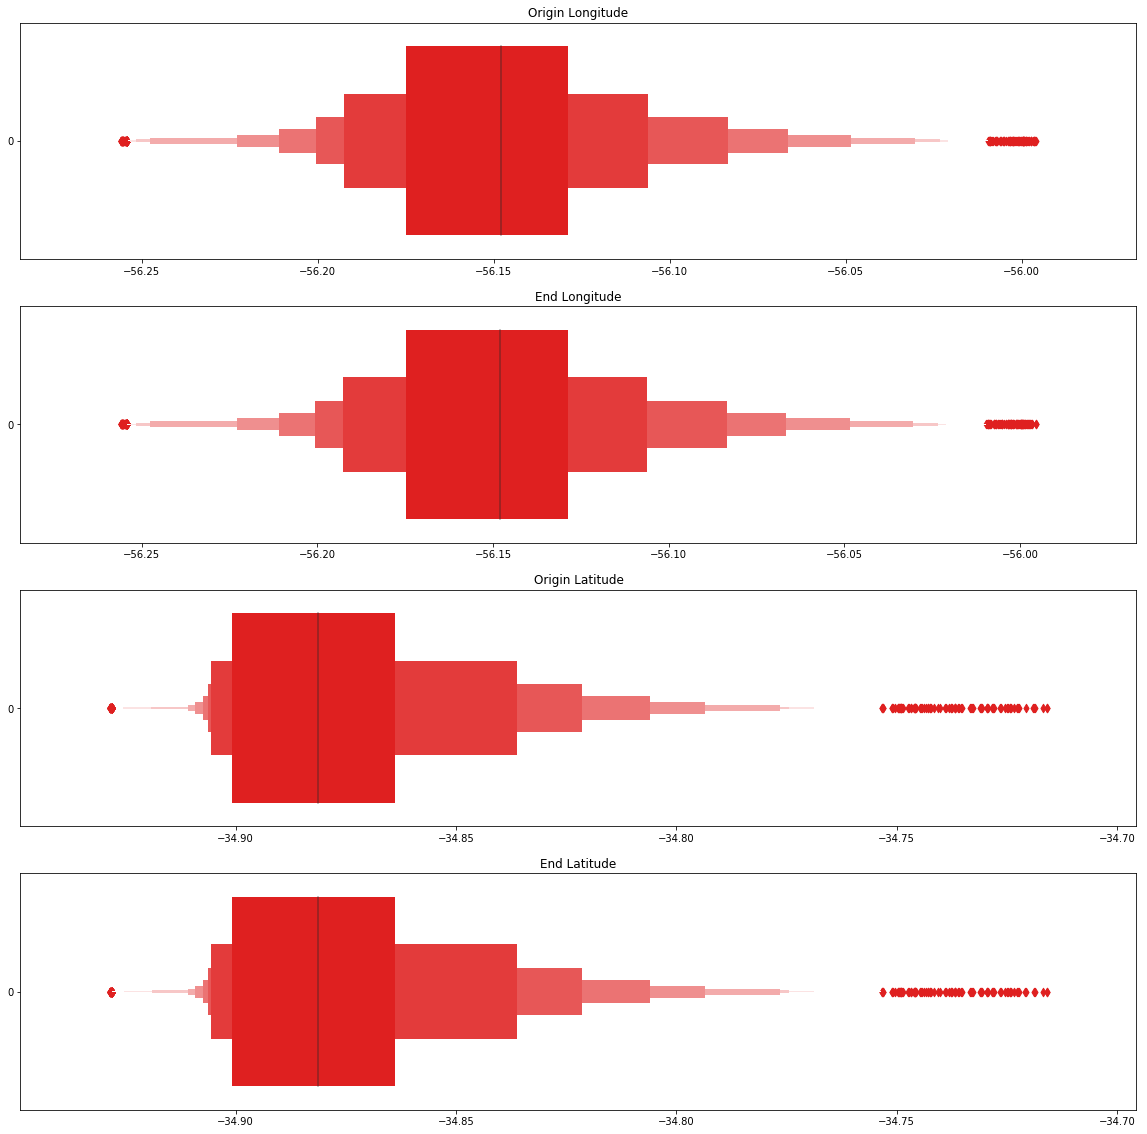

In [104]:
matplotlib.rcParams['figure.figsize'] = [20,20]
plt.subplot(411)
plt.title('Origin Longitude')
sns.boxenplot(data=data.longitude, orient='horizontal', color='red')
plt.subplot(412)
plt.title('End Longitude')
sns.boxenplot(data=data.next_longitude, orient='horizontal', color='red')
plt.subplot(413)
plt.title('Origin Latitude')
sns.boxenplot(data=data.latitude, orient='horizontal', color='red')
plt.subplot(414)
plt.title('End Latitude')
sns.boxenplot(data=data.next_latitude, orient='horizontal', color='red')

plt.show()

Podemos ver algunos datos que pueden ser considerados outliers pero como vimos en secciones anteriores estas son de la linea 142 que se aleja de la media de los datos dado que esta linea llega a Canelones.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


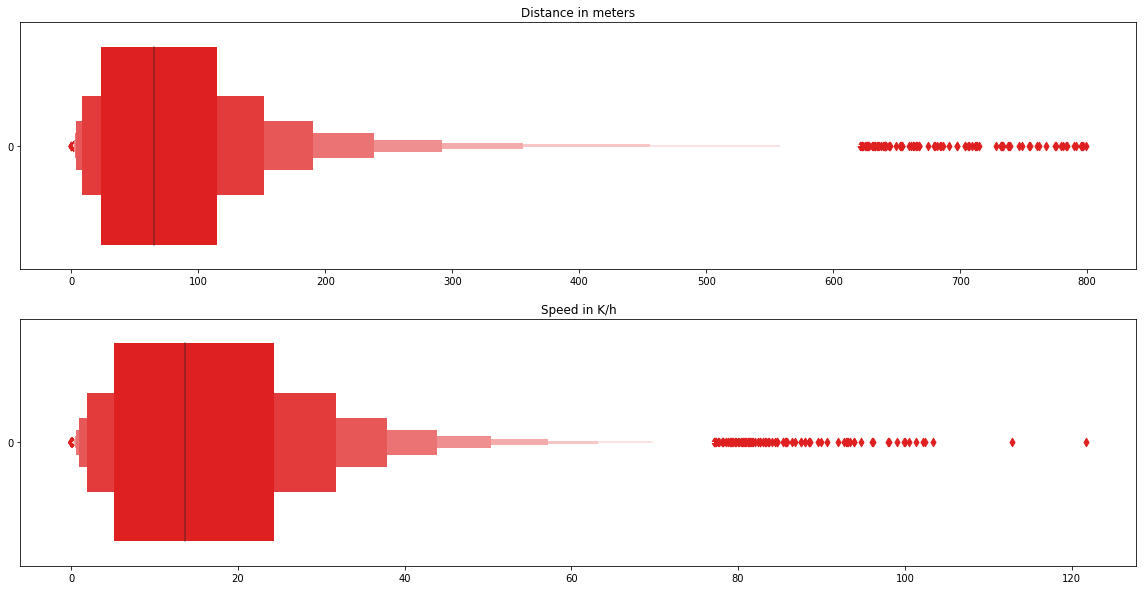

In [109]:
matplotlib.rcParams['figure.figsize'] = [20,10]
plt.subplot(211)
plt.title('Distance in meters')
sns.boxenplot(data=data.distance, orient='horizontal', color='red')
plt.subplot(212)
plt.title('Speed in K/h')
sns.boxenplot(data=data.speed.apply(lambda x: ms_to_kh(x)), orient='horizontal', color='red')

Las velocidades son razonables para los omnibus, los pocos casos en los que se llegan a altas velocidades pueden deberse a zonas. Para comprobar esto vamos a ver cuales son las zonas en las cuales se llega a estas velocidades. Vamos a utilizar las velocidades superiores a 30 m/s (aproximadamente 108 k/h)

In [112]:
data.query('speed > 30')

,id,line,longitude,latitude,timestamp,next_longitude,next_latitude,next_timestamp,distance,time,speed,matrix_position
2161,45,217,-56.182518,-34.882500,2018-10-02 15:37:55,-56.187200,-34.880733,2018-10-02 15:38:10,470.107551,0 days 00:00:15.000000000,31.340503,"[5, 8]"
21540,1015,343,-56.134140,-34.865665,2018-10-02 14:39:08,-56.135025,-34.870167,2018-10-02 14:39:23,507.068996,0 days 00:00:15.000000000,33.804600,"[7, 13]"
